# Importing Libraries

In [32]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import re

# Importing Dataset

In [5]:
data = pd.read_csv('Sentiment.csv')

In [6]:
data = data[['sentiment', 'text']]

In [7]:
data.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


# Data Preprocessing

In [21]:
# removing neutral data
data = data[data.sentiment != "Neutral"]

# converts to lowercase and removing non-alphanumeric characters
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

# print size of positive and negative data
print("Positive Instances: ", data[ data['sentiment'] == 'Positive'].size)
print("Negative Instances: ", data[ data['sentiment'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

Positive Instances:  4472
Negative Instances:  16986


# Exploratory Data Analysis

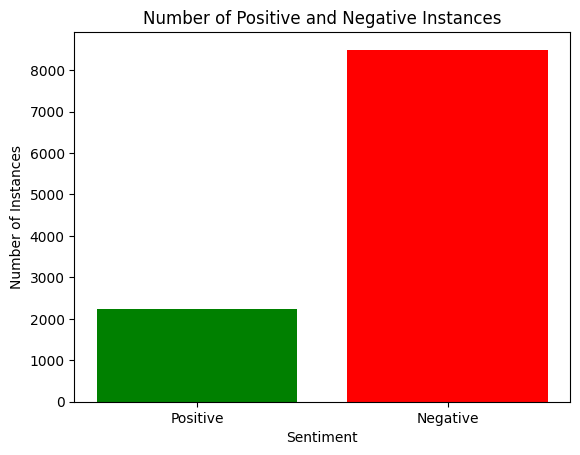

In [35]:
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'sentiment' column
positive_count = data[data['sentiment'] == 'Positive'].shape[0]
negative_count = data[data['sentiment'] == 'Negative'].shape[0]

# Data for the bar plot
sentiments = ['Positive', 'Negative']
counts = [positive_count, negative_count]

# Plotting the bar plot
plt.bar(sentiments, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Instances')
plt.title('Number of Positive and Negative Instances')
plt.show()

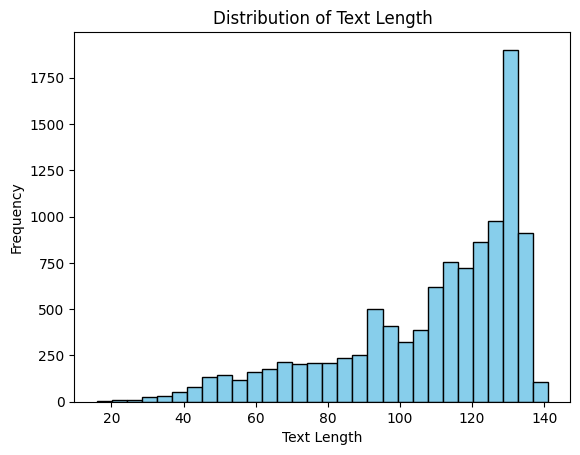

In [36]:
plt.hist(data['text'].apply(len), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

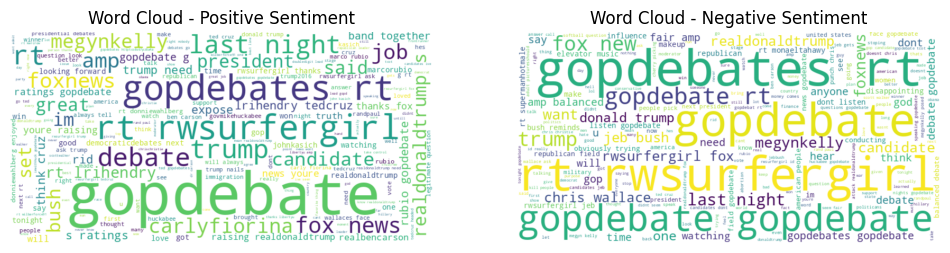

In [37]:
from wordcloud import WordCloud

positive_text = ' '.join(data[data['sentiment'] == 'Positive']['text'])
negative_text = ' '.join(data[data['sentiment'] == 'Negative']['text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')

plt.show()

# Model Creation

In [9]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 28, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511194 (1.95 MB)
Trainable params: 511194 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Train-Test Split

In [10]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7188, 28) (7188, 2)
(3541, 28) (3541, 2)


# Model Training

In [11]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 40, batch_size=batch_size, verbose = 2)

Epoch 1/40
225/225 - 48s - loss: 0.4498 - accuracy: 0.8108 - 48s/epoch - 211ms/step
Epoch 2/40
225/225 - 36s - loss: 0.3173 - accuracy: 0.8673 - 36s/epoch - 161ms/step
Epoch 3/40
225/225 - 39s - loss: 0.2771 - accuracy: 0.8844 - 39s/epoch - 175ms/step
Epoch 4/40
225/225 - 37s - loss: 0.2513 - accuracy: 0.8966 - 37s/epoch - 163ms/step
Epoch 5/40
225/225 - 38s - loss: 0.2247 - accuracy: 0.9071 - 38s/epoch - 170ms/step
Epoch 6/40
225/225 - 36s - loss: 0.2010 - accuracy: 0.9214 - 36s/epoch - 159ms/step
Epoch 7/40
225/225 - 38s - loss: 0.1771 - accuracy: 0.9311 - 38s/epoch - 169ms/step
Epoch 8/40
225/225 - 36s - loss: 0.1631 - accuracy: 0.9348 - 36s/epoch - 159ms/step
Epoch 9/40
225/225 - 38s - loss: 0.1479 - accuracy: 0.9409 - 38s/epoch - 169ms/step
Epoch 10/40
225/225 - 36s - loss: 0.1356 - accuracy: 0.9464 - 36s/epoch - 159ms/step
Epoch 11/40
225/225 - 38s - loss: 0.1241 - accuracy: 0.9502 - 38s/epoch - 169ms/step
Epoch 12/40
225/225 - 36s - loss: 0.1168 - accuracy: 0.9519 - 36s/epoch - 

# Validation

In [22]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

# printing score and accuracy agter removing validation data from test data
print("Score: %.2f" % (score))
print("Accuracy: %.2f" % (acc))

17/17 - 0s - loss: 1.1979 - accuracy: 0.8059 - 383ms/epoch - 23ms/step
Score: 1.20
Accuracy: 0.81


In [23]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
    # checking if the predicted class index matches the true class index
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
    # counting total positive and negative samples
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

print("Positive accuracy: ", pos_correct/pos_cnt*100, "%")
print("Negative accuracy: ", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 37ms/epoch - 37ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 38ms/epoch - 38ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 37ms/epoch - 37ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 36ms/epoch - 36ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 41m

# Prediction

In [31]:
twt = ["This product is terrible. I regret buying it."]
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
#print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Negative")
elif (np.argmax(sentiment) == 1):
    print("Positive")

1/1 - 0s - 106ms/epoch - 106ms/step
Negative
